# Liability-to-Loan Conversion Optimization Project




*   **Data Description:** The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

*   **Context:** This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
bank_data_df = pd.read_csv("/content/drive/MyDrive/Project 2024/Finance Project/Bank_Personal_Loan_Modelling.csv")
bank_data_df.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
bank_data_df.shape

(5000, 14)

###### Checking for NULL Values

In [4]:
bank_data_df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

###### Columns Details

In [5]:
bank_data_df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

###### Basic Overview

In [6]:
bank_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [7]:
bank_data_df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


###### Univariate Analysis:

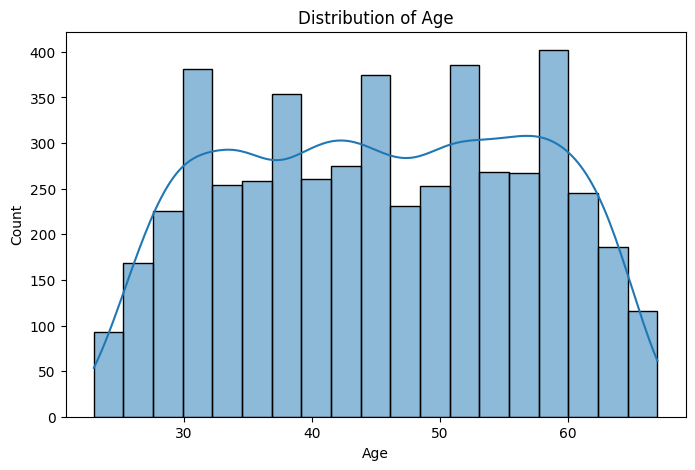

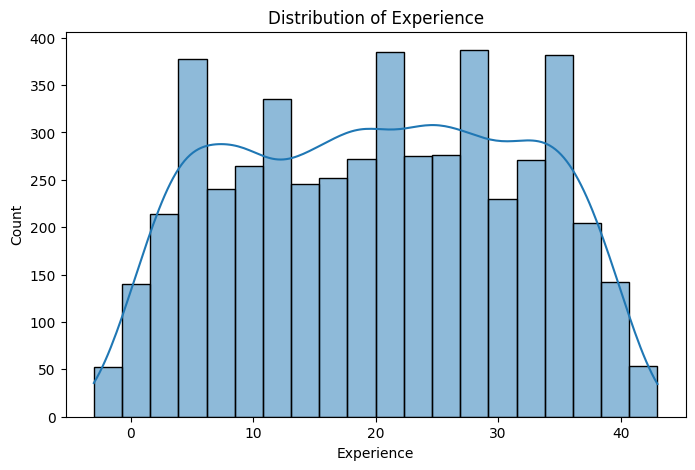

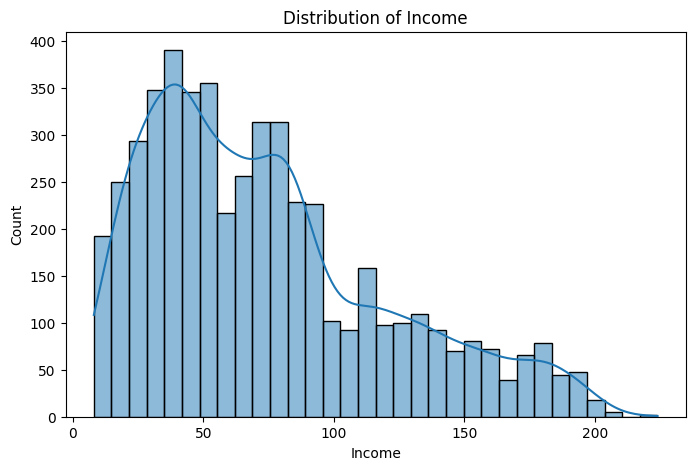

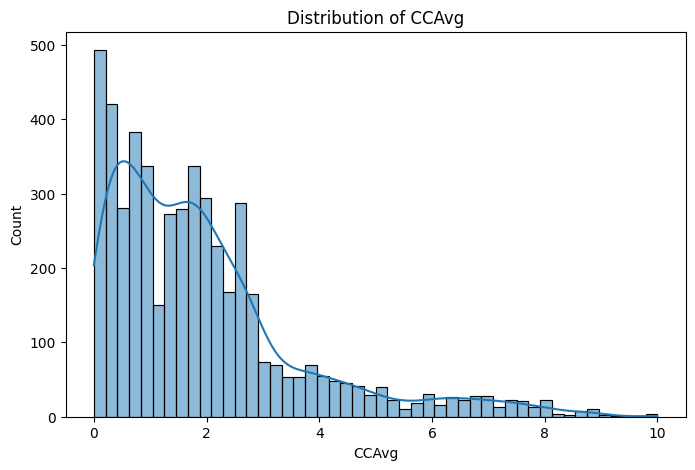

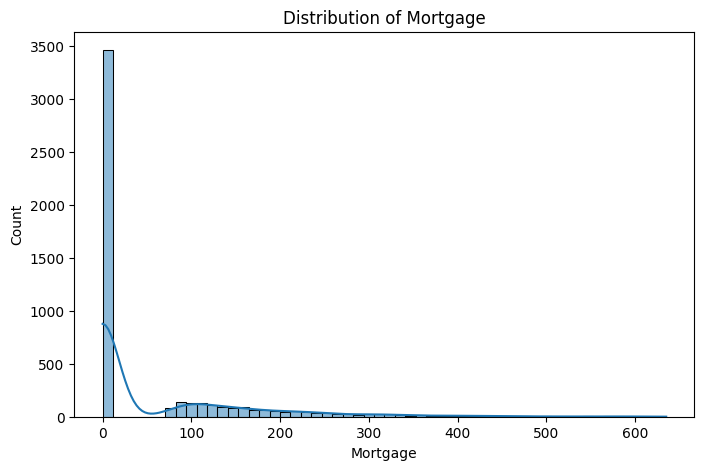

In [8]:
# Numerical variables
numerical_features = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(bank_data_df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

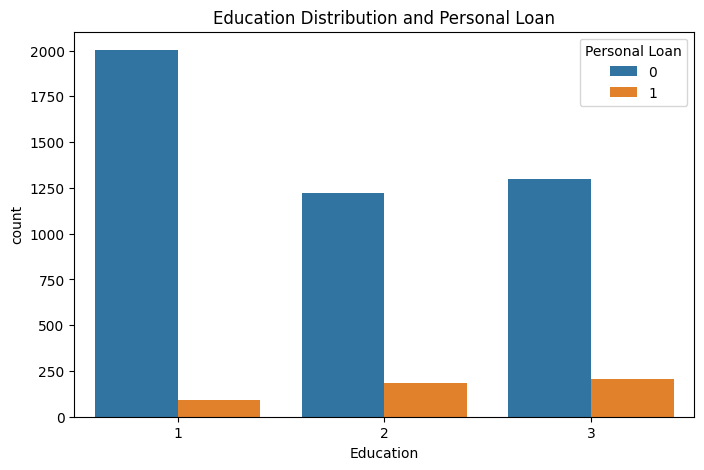

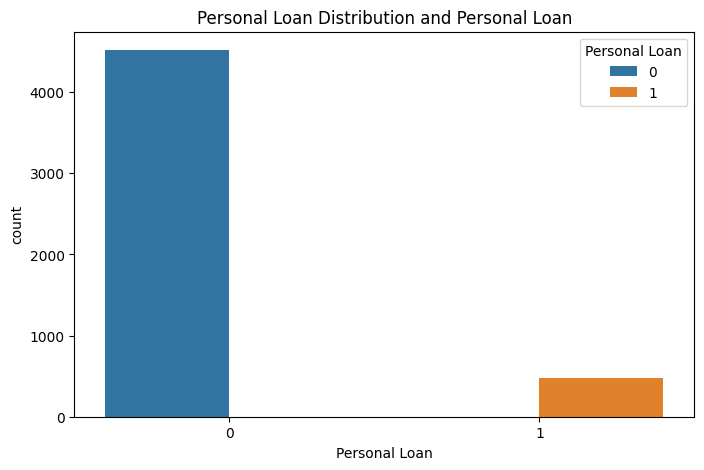

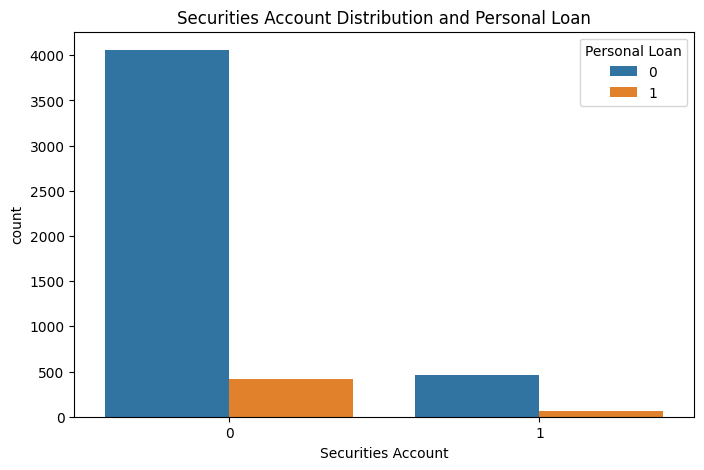

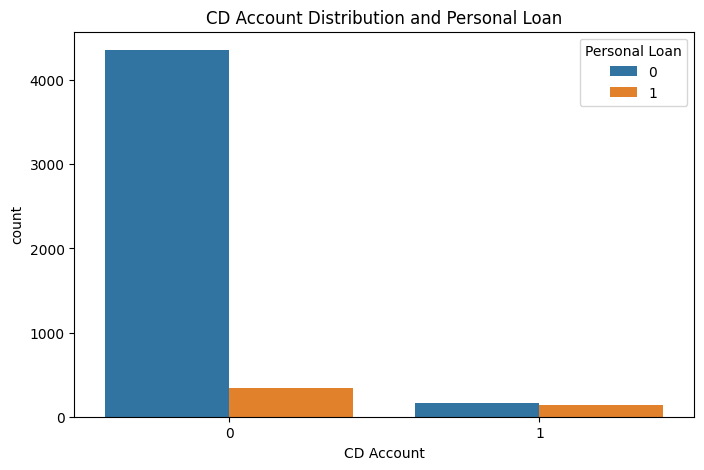

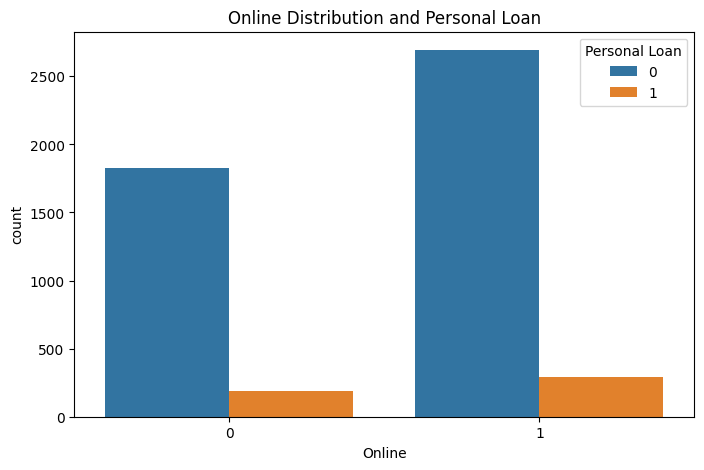

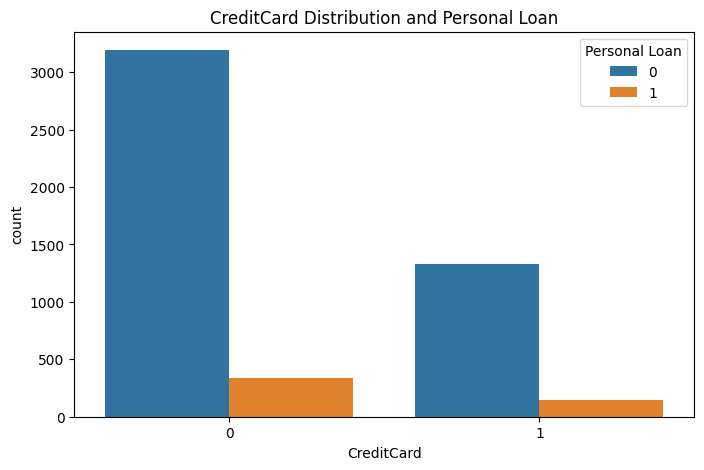

In [9]:
# Proportion plots for categorical variables
# Categorical variables
categorical_features = ['Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=feature, data=bank_data_df, hue='Personal Loan', dodge=True)
    plt.title(f'{feature} Distribution and Personal Loan')
    plt.show()

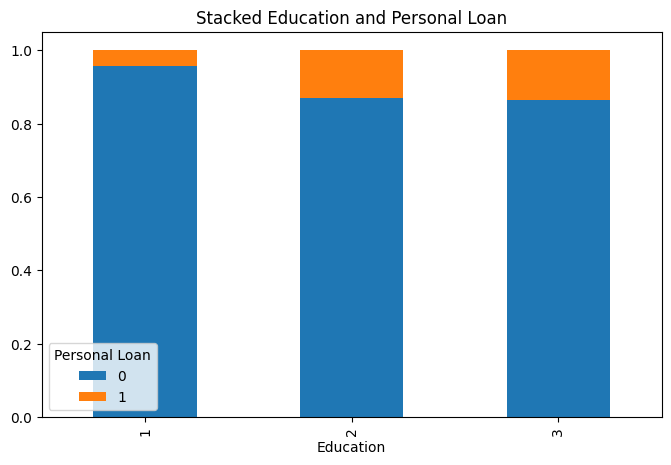

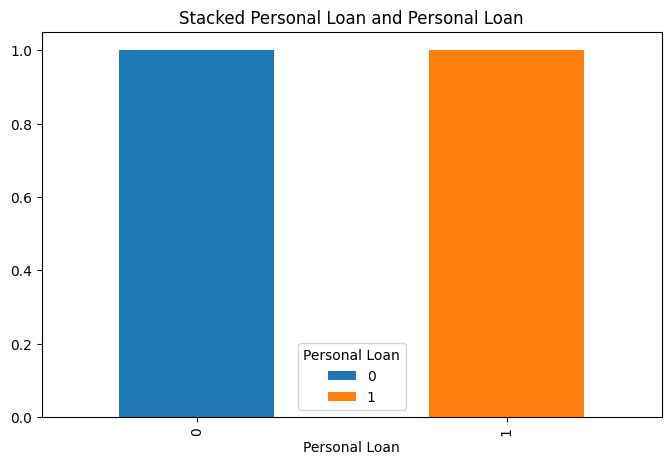

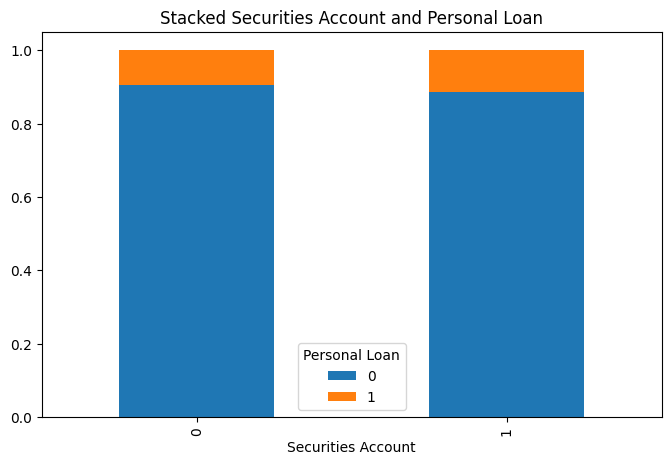

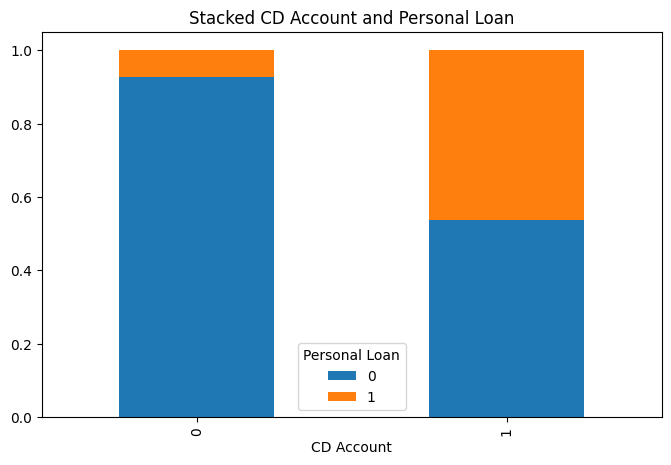

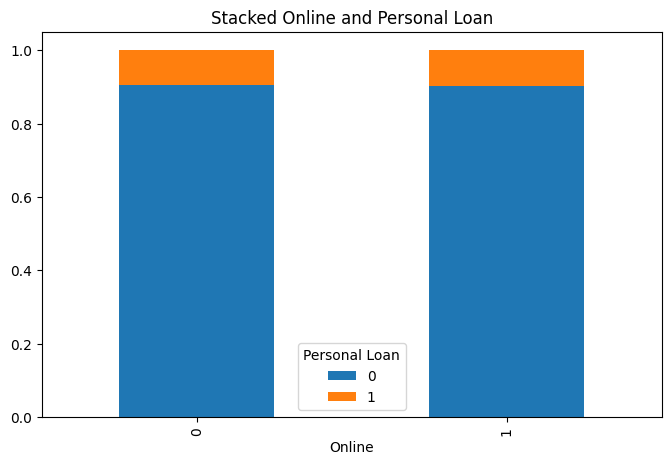

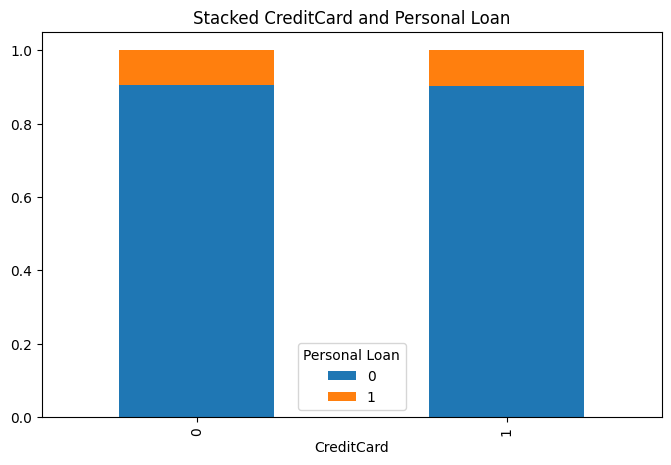

In [10]:
# Stacked bar plots for categorical variables
for feature in categorical_features:
    ct = pd.crosstab(bank_data_df[feature], bank_data_df['Personal Loan'], normalize='index')
    ct.plot(kind='bar', stacked=True, figsize=(8, 5))
    plt.title(f'Stacked {feature} and Personal Loan')
    plt.show()


In [11]:
from scipy.stats import chi2_contingency

# Chi-square test for each categorical variable
for feature in categorical_features:
    contingency_table = pd.crosstab(bank_data_df[feature], bank_data_df['Personal Loan'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f'Chi-square test for {feature}: p-value = {p}')

Chi-square test for Education: p-value = 6.991473868665428e-25
Chi-square test for Personal Loan: p-value = 0.0
Chi-square test for Securities Account: p-value = 0.14051497326319357
Chi-square test for CD Account: p-value = 7.398297503329848e-110
Chi-square test for Online: p-value = 0.6928599643141484
Chi-square test for CreditCard: p-value = 0.8843861223314504


1. Chi-square test for Education:
Null Hypothesis (H0): There is no association between Education and the likelihood of taking a Personal Loan.
Alternative Hypothesis (H1): There is an association between Education and the likelihood of taking a Personal Loan.
Interpretation: The p-value is very small (p-value = 6.99e-25), well below the common significance level of 0.05. Therefore, you can reject the null hypothesis and conclude that **there is a significant association between Education and the likelihood of taking a Personal Loan**.

2. Chi-square test for Personal Loan:
Null Hypothesis (H0): There is no association between Personal Loan acceptance and the respective variable.
Alternative Hypothesis (H1): There is an association between Personal Loan acceptance and the respective variable.
Interpretation: The p-value is very small (p-value = 0.0), indicating a highly significant result. This suggests a **strong association between Personal Loan acceptance and the respective variable.**

3. Chi-square test for Securities Account:
Null Hypothesis (H0): There is no association between having a Securities Account and the likelihood of taking a Personal Loan.
Alternative Hypothesis (H1): There is an association between having a Securities Account and the likelihood of taking a Personal Loan.
Interpretation: The p-value is 0.14, which is greater than 0.05. Therefore, you fail to reject the null hypothesis. This suggests that there is no significant association between having a Securities Account and the likelihood of taking a Personal Loan.

4. Chi-square test for CD Account:
Null Hypothesis (H0): There is no association between having a CD Account and the likelihood of taking a Personal Loan.
Alternative Hypothesis (H1): There is an association between having a CD Account and the likelihood of taking a Personal Loan.
Interpretation: The p-value is extremely small (p-value = 7.4e-110), indicating a highly significant result. **This suggests a strong association between having a CD Account and the likelihood of taking a Personal Loan.**

5. Chi-square test for Online:
Null Hypothesis (H0): There is no association between Online banking usage and the likelihood of taking a Personal Loan.
Alternative Hypothesis (H1): There is an association between Online banking usage and the likelihood of taking a Personal Loan.
Interpretation: The p-value is 0.69, which is greater than 0.05. Therefore, you fail to reject the null hypothesis. This suggests that there is no significant association between Online banking usage and the likelihood of taking a Personal Loan.

6. Chi-square test for CreditCard:
Null Hypothesis (H0): There is no association between having a Credit Card and the likelihood of taking a Personal Loan.
Alternative Hypothesis (H1): There is an association between having a Credit Card and the likelihood of taking a Personal Loan.
Interpretation: The p-value is 0.88, which is greater than 0.05. Therefore, you fail to reject the null hypothesis. This suggests that there is no significant association between having a Credit Card and the likelihood of taking a Personal Loan.

###### Bivariate Analysis:

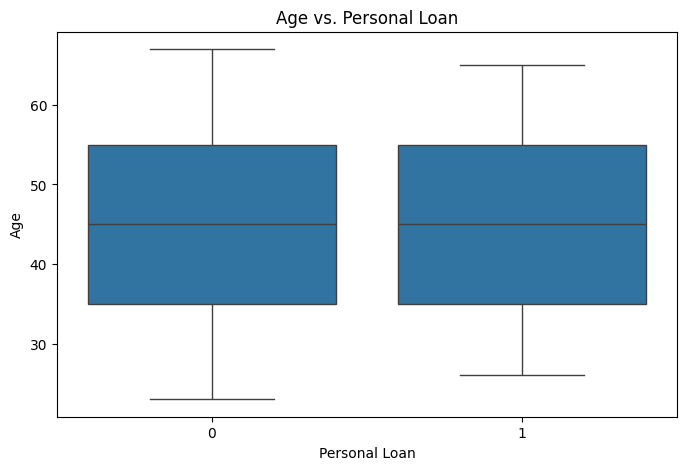

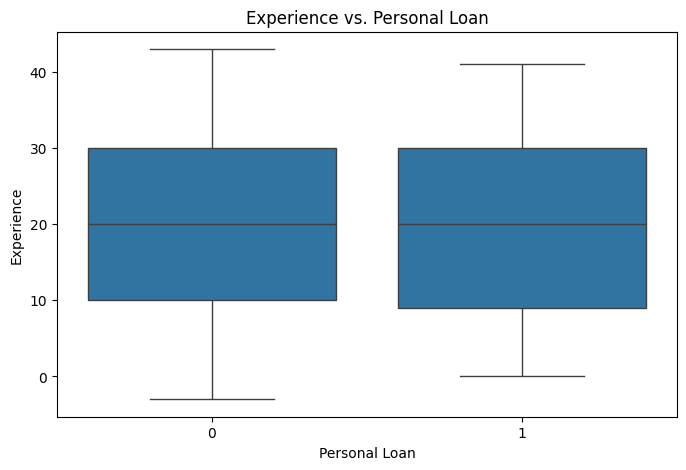

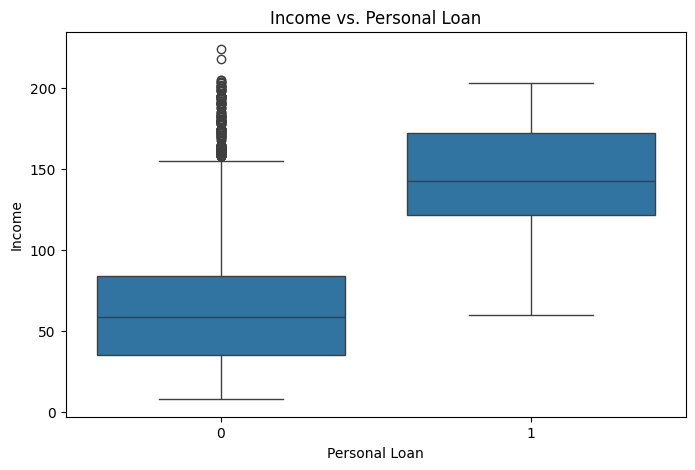

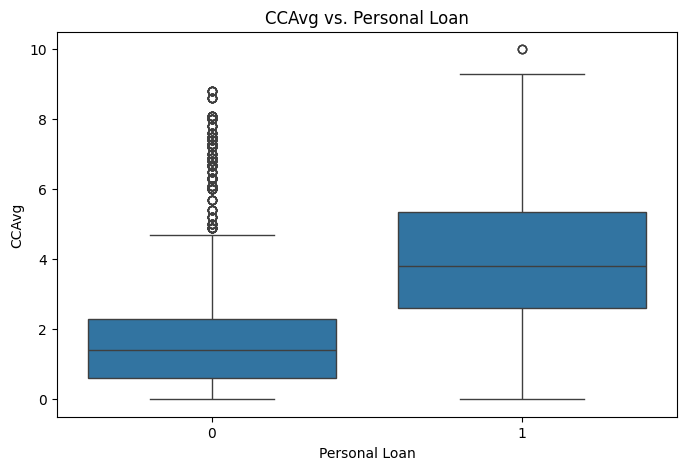

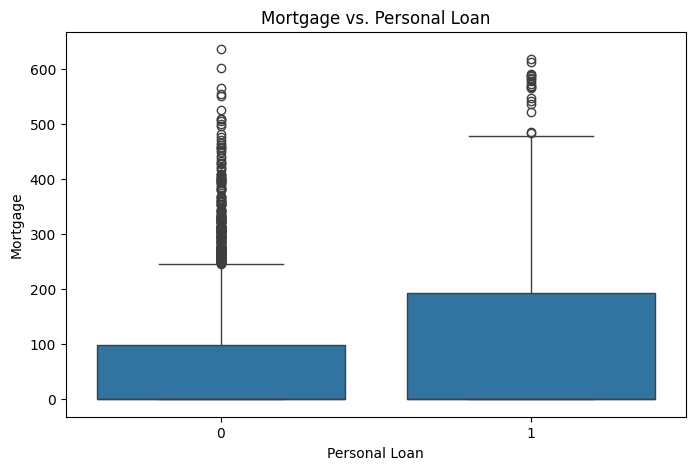

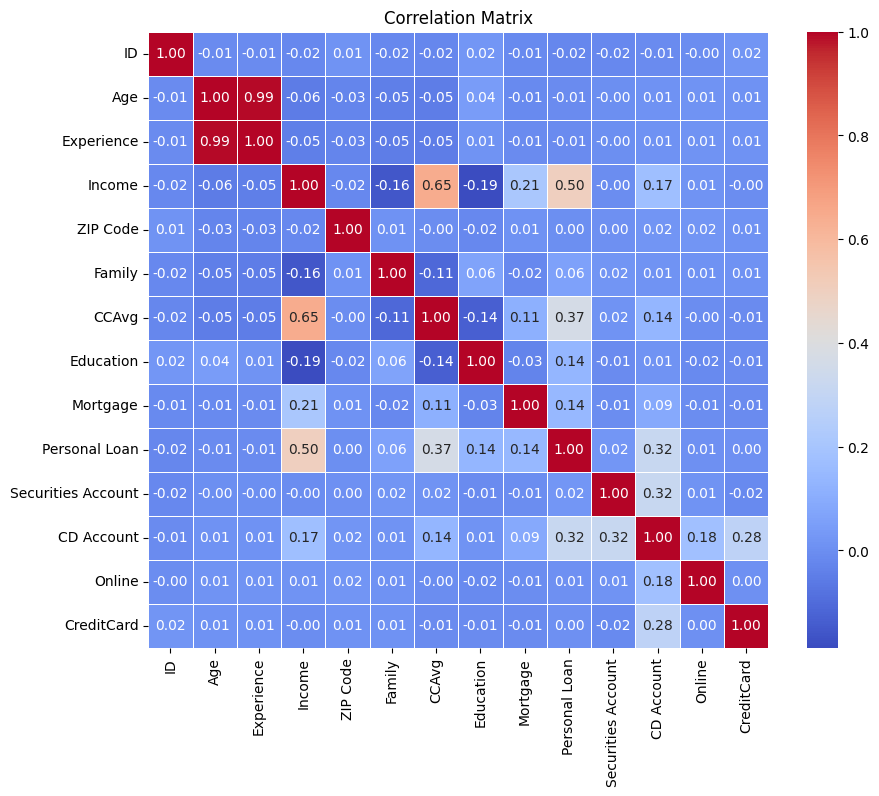

In [12]:
# Numerical variables vs. Personal Loan
numerical_vs_loan = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']
for feature in numerical_vs_loan:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Personal Loan', y=feature, data=bank_data_df)
    plt.title(f'{feature} vs. Personal Loan')
    plt.show()

# Correlation matrix
correlation_matrix = bank_data_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


###### Categorical Variables Analysis:

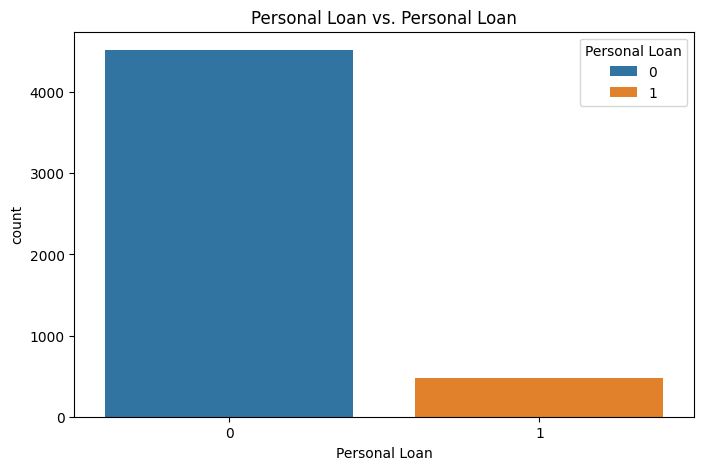

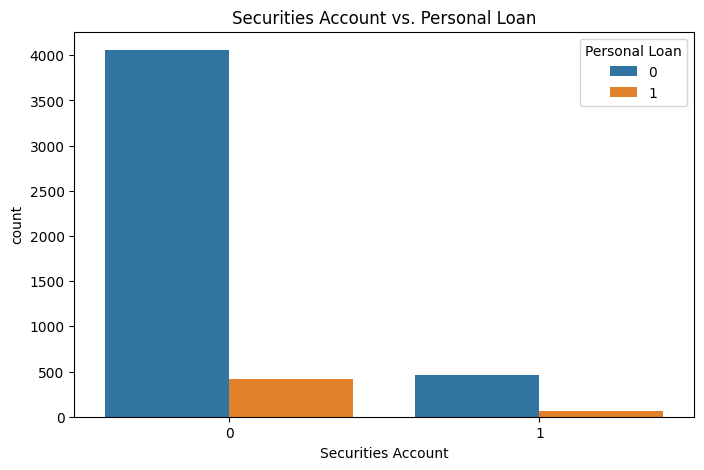

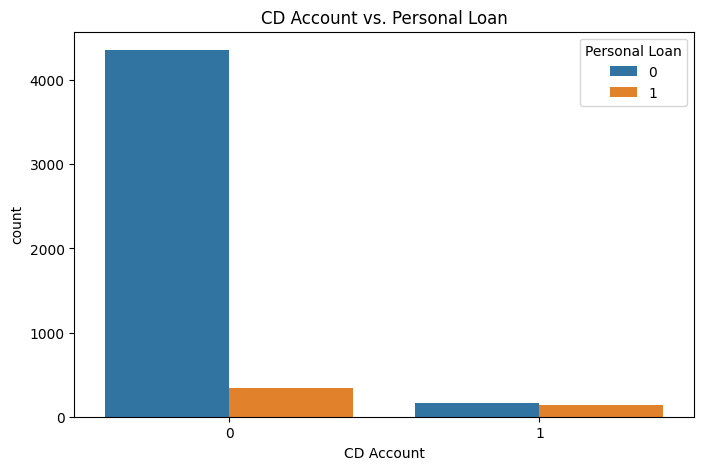

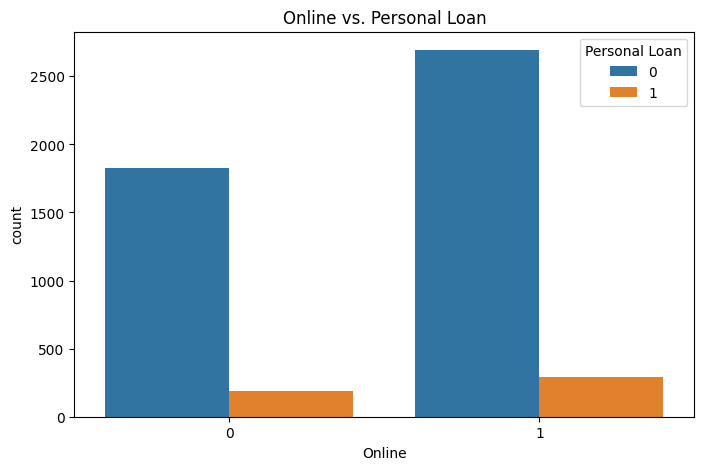

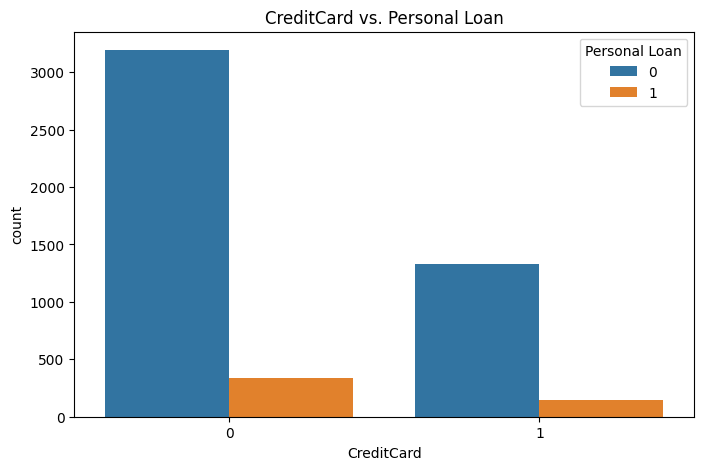

In [13]:
# Personal Loan vs. Categorical variables
# Categorical variables
categorical_features = ['Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
for feature in categorical_features[1:]:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=feature, hue='Personal Loan', data=bank_data_df)
    plt.title(f'{feature} vs. Personal Loan')
    plt.show()

###### Checking for further segregation in years of Experience

<ipython-input-14-c9683a5b17a6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bank_data_df['Experience'])


<Axes: xlabel='Experience', ylabel='Density'>

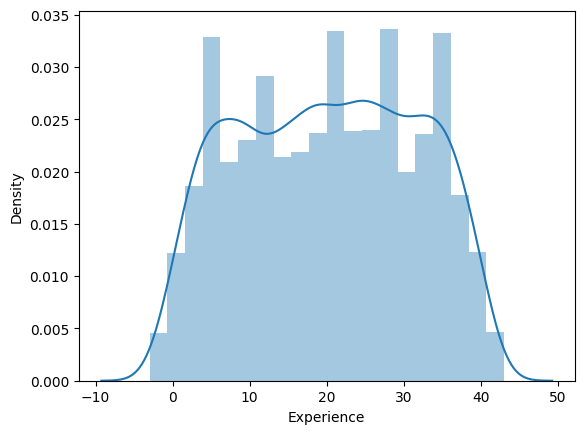

In [14]:
sns.distplot(bank_data_df['Experience'])

In [15]:
bank_data_df['Experience'].mean()

20.1046

###### Checking for negative experience years

In [16]:
negative_yrs_exp = bank_data_df[bank_data_df['Experience']<0]
negative_yrs_exp.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,90,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,227,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,316,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,452,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,525,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0


In [17]:
negative_yrs_exp.shape

(52, 14)

<ipython-input-18-0682d8007e56>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(negative_yrs_exp['Age'])


<Axes: xlabel='Age', ylabel='Density'>

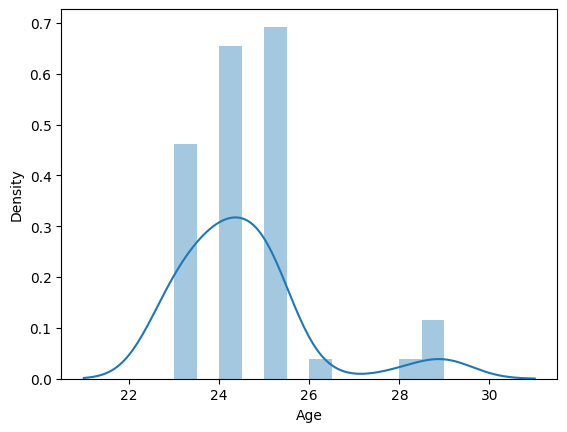

In [18]:
sns.distplot(negative_yrs_exp['Age'])

In [19]:
negative_yrs_exp['Experience'].mean()

-1.4423076923076923

In [20]:
negative_yrs_exp.size

728

In [21]:
print('There are {} records which has negative values for experience, approx {} %'.format(negative_yrs_exp.size ,
                                ((negative_yrs_exp.size/bank_data_df.size)*100)))

There are 728 records which has negative values for experience, approx 1.04 %


In [22]:
bank_data = bank_data_df.copy()

In [23]:
bank_data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [24]:
bank_data.shape

(5000, 14)

In [25]:
bank_data['Experience'] = np.where(bank_data['Experience'] < 0,
                                   bank_data['Experience'].mean(),
                                   bank_data['Experience'])

In [26]:
bank_data[bank_data['Experience']<0]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


In [27]:
bank_data.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.009344,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.977008,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.009344,0.977008,1.000000,-0.049054,-0.028488,-0.045488,-0.048708,0.018097,-0.013378,-0.014045,-0.000462,0.005502,0.013455,0.008833
Income,-0.017695,-0.055269,-0.049054,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028488,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.045488,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.048708,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.018097,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.013378,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.014045,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


<Axes: >

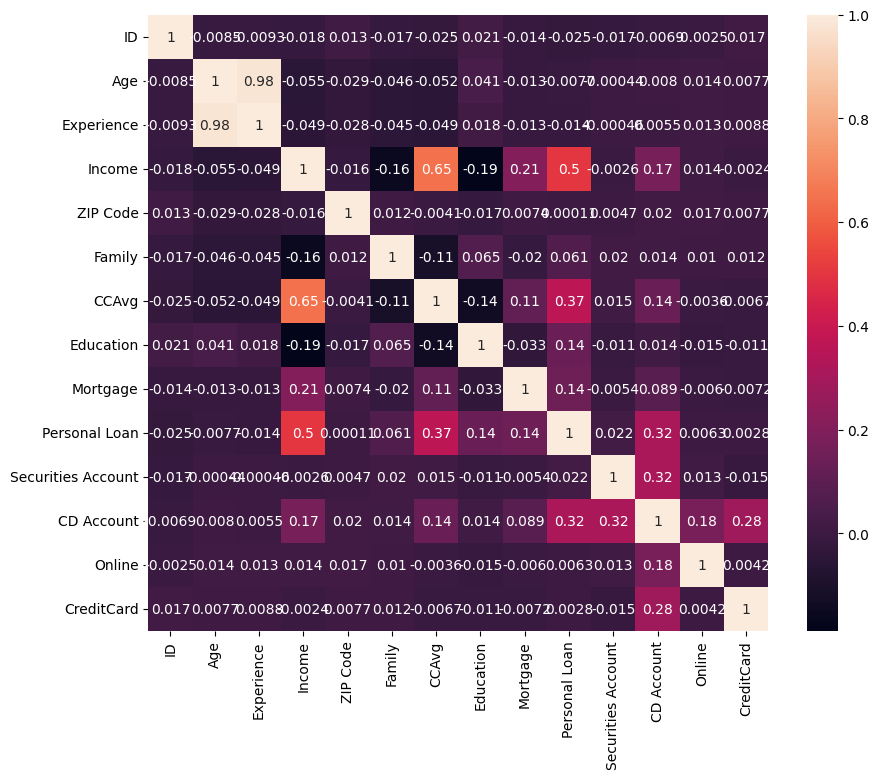

In [28]:
plt.figure(figsize = (10,8))
sns.heatmap(bank_data.corr(), annot = True)

In [29]:
bank_data = bank_data.drop(['Experience'], axis = 1)

In [30]:
bank_data.head()

,ID,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,45,91330,4,1.0,2,0,0,0,0,0,1


###### Checking for Education

In [31]:
bank_data['Education'].unique()

array([1, 2, 3])

In [32]:
def experience(x):
  if x ==1:
    return "Undergraduate"
  if x == 2:
    return "Graduate"
  if x == 3:
    return "Professional"

In [33]:
bank_data['Education Level'] = bank_data['Education'].apply(experience)

In [34]:
bank_data.head()

,ID,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education Level
0,1,25,49,91107,4,1.6,1,0,0,1,0,0,0,Undergraduate
1,2,45,34,90089,3,1.5,1,0,0,1,0,0,0,Undergraduate
2,3,39,11,94720,1,1.0,1,0,0,0,0,0,0,Undergraduate
3,4,35,100,94112,1,2.7,2,0,0,0,0,0,0,Graduate
4,5,35,45,91330,4,1.0,2,0,0,0,0,0,1,Graduate


In [35]:
bank_data['Education Level'].unique()

array(['Undergraduate', 'Graduate', 'Professional'], dtype=object)

In [36]:
Education_Distribution = bank_data.groupby('Education Level')['Age'].count()

In [37]:
Education_Distribution

Education Level
Graduate         1403
Professional     1501
Undergraduate    2096
Name: Age, dtype: int64